![Images](Images/ITAcademy.png)
# DATA SCIENCE: S04.T01.EXERCICI 1
#### Created by: Dani Planas Montserrat


In [10]:
##########################################################################
##           DATA SCIENCE: S04.T01: Nivell 1 Exercici 1                 ##
##########################################################################
# Exercici 1: Estandaritza, identifica i enumera cada un dels atributs / 
# variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que 
# trobaràs al repositori de GitHub "Data-sources".

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')




In [11]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(pathName):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(pathName, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(pathName, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

In [18]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [13]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [14]:
#************************************************************************************
#********************************         Main       ********************************
#************************************************************************************

path_name = "Data sets\\SP04\\"                                        # Define Path name
file_name = "Web_access_log-akumenius.com.txt"                         # Define File name
separator = '- -'                                                      # Define type of char between columns
movie_column_l = ['col1', 'col2', 'col3','col4', 'col5', 'col6']       # Define number of columns

df = openFileTable(path_name, file_name, separator, movie_column_l)    #Function to open File


print ("Taula de log visites realitzades a la web akimenius.com: ")     #Print Message
display(df)                                                             #Display datset imported


# Describe and identify the variables and columns
dfLogWeb = pd.DataFrame()
dfLogWeb=dfLogWeb.assign(Domini=0)
dfLogWeb=dfLogWeb.assign(IP=0)
dfLogWeb=dfLogWeb.assign(Data=0)
dfLogWeb=dfLogWeb.assign(Hora=0)
#dfLogWeb=dfLogWeb.assign(UTC=0                                       ##All "UTC" are the same: +0100

dfLogWeb=dfLogWeb.assign(Pais=0)
dfLogWeb=dfLogWeb.assign(Latitud=0)
dfLogWeb=dfLogWeb.assign(Longitud=0)
dfLogWeb=dfLogWeb.assign(Connexió=0)


display (dfLogWeb)


Taula de log visites realitzades a la web akimenius.com: 


,col1,col2,col3,col4,col5,col6
0,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
1,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
2,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
3,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
4,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
...,...,...,...,...,...,...
261868,www.akumenius.com 5.255.253.53,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (c...",None,NaN,NaN
261869,www.akumenius.com 74.86.158.107,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(com...",None,NaN,NaN
261870,localhost 127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN
261871,localhost 127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",None,NaN,NaN


,Domini,IP,Data,Hora,Pais,Latitud,Longitud,Connexió


<span style=color:green><b>IMPORTACIÓ DE DADES / IDENTIFICACIÓ ATRIBUTS</u></b></span> 

En el Punt anterior hem exportat les dades d'una dataset. Prèviament hem fet un petit tractament amb el "NOTEPAD" per facilitar l'exportació en 3 columnes.

Un cop exportades les dades hem identificat i enumerat els camps que podrem extreure del dataset (previ al tractament i processat de les dades que reilitzarem en el pròxim apartat) i les preparem en el dataset on posarem les dades procesades.

In [15]:
##########################################################################
##           DATA SCIENCE: S04.T01: Nivell 2 Exercici 2                 ##
##########################################################################
# Exercici 2: Neteja, preprocesa, estructura i transforma (dataframe) les
# dades del registre d'Accés a la web.


df['col4'] = df['col1'].apply(lambda x: x.split(" ",1)[0])
df['col5'] = df['col1'].apply(lambda x: x.split(" ",1)[1])

df['col6'] = df['col2'].apply(lambda x: x.split(":",1)[0])
df['col6'] = df['col6'].apply(lambda x: re.sub( "[[]" , "", x))

df['col7'] = df['col2'].apply(lambda x: x.split(":",1)[1])
df['col7'] = df['col7'].apply(lambda x: x.split("+",1)[0])

#Define de column woth domain
dfLogWeb['Domini'] = df['col1'].apply(lambda x: x.split(" ",1)[0])

#Define the column IP address
dfLogWeb['IP'] = df['col1'].apply(lambda x: x.split(" ",1)[1])
dfLogWeb['IP'] = df['col5'].apply(lambda x: re.sub( " " , "", x))

#Define the column Data
dfLogWeb['Data'] = df['col2'].apply(lambda x: x.split(":",1)[0])
dfLogWeb['Data'] = df['col6'].apply(lambda x: re.sub( "[[]" , "", x))

#Define the column Hour
dfLogWeb['Hora'] = df['col2'].apply(lambda x: x.split(":",1)[1])
dfLogWeb['Hora'] = df['col7'].apply(lambda x: x.split("[+]",1)[0])

#Define the column connection
dfLogWeb['Connexió'] = df['col3']

# Print dataframe
display(df) 
display (dfLogWeb)

,col1,col2,col3,col4,col5,col6,col7
0,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,23/Feb/2014,03:10:31
1,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,23/Feb/2014,03:10:31
2,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,23/Feb/2014,03:10:31
3,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,23/Feb/2014,03:10:31
4,localhost 127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,23/Feb/2014,03:10:31
...,...,...,...,...,...,...,...
261868,www.akumenius.com 5.255.253.53,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (c...",www.akumenius.com,5.255.253.53,02/Mar/2014,03:05:39
261869,www.akumenius.com 74.86.158.107,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(com...",www.akumenius.com,74.86.158.107,02/Mar/2014,03:09:52
261870,localhost 127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,02/Mar/2014,03:10:18
261871,localhost 127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter...",localhost,127.0.0.1,02/Mar/2014,03:10:18


,Domini,IP,Data,Hora,Pais,Latitud,Longitud,Connexió
0,localhost,127.0.0.1,23/Feb/2014,03:10:31,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
1,localhost,127.0.0.1,23/Feb/2014,03:10:31,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
2,localhost,127.0.0.1,23/Feb/2014,03:10:31,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
3,localhost,127.0.0.1,23/Feb/2014,03:10:31,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
4,localhost,127.0.0.1,23/Feb/2014,03:10:31,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014,03:05:39,NaN,NaN,NaN,"""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (c..."
261869,www.akumenius.com,74.86.158.107,02/Mar/2014,03:09:52,NaN,NaN,NaN,"""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(com..."
261870,localhost,127.0.0.1,02/Mar/2014,03:10:18,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."
261871,localhost,127.0.0.1,02/Mar/2014,03:10:18,NaN,NaN,NaN,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (inter..."


<span style=color:green><b>TRACTAMENT DE DADES</u></b></span> 

Podem observar que en el punt anterior hem extret les dades del dataset exportat i les hem anat introduïnt al nou dataset.

In [16]:
##########################################################################
##           DATA SCIENCE: S04.T01: Nivell 2 Exercici 3                 ##
##########################################################################
# Exercici 3: Geolocalitza les IP's.


#Remove all register that have with a local host IP adress
New_dfLogWeb = dfLogWeb[dfLogWeb.Domini != 'localhost']                 # Using logical condition#
#New_dfLogWeb = dfLogWeb.groupby(['IP']).first()                        # Show dataset


New_dfLogWeb = dfLogWeb.groupby(['IP']).first()                         # Group the dataset by IP's
New_dfLogWeb.reset_index(inplace=True, drop=False)                      # Restart number of Index
New_dfLogWeb = New_dfLogWeb.head(n=30)                                  # Take the first n rows from dataset 
#display(New_dfLogWeb)                                                  # Show dataset



New_dfLogWeb['Pais'] = New_dfLogWeb.apply(lambda row: getInfoGeolocation(row['IP'], 1), axis=1)
New_dfLogWeb['Latitud'] = New_dfLogWeb.apply(lambda row: getInfoGeolocation(row['IP'], 2), axis=1)
New_dfLogWeb['Longitud'] = New_dfLogWeb.apply(lambda row: getInfoGeolocation(row['IP'], 3), axis=1)

# Display Dataset
display (New_dfLogWeb)



,IP,Domini,Data,Hora,Pais,Latitud,Longitud,Connexió
0,101.199.108.59,www.akumenius.com,26/Feb/2014,10:01:56,CN,39.906217,116.391276,"""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (X..."
1,101.226.167.226,www.akumenius.com,28/Feb/2014,16:14:04,CN,31.401568,121.445299,"""GET /robots.txt HTTP/1.1"" 200 743 ""http://ww..."
2,107.178.37.48,www.akumenius.com,01/Mar/2014,22:17:53,US,37.322893,-122.032290,"""GET / HTTP/1.1"" 200 7528 ""http://www.ratonvi..."
3,107.178.38.221,www.akumenius.com,27/Feb/2014,23:40:04,US,37.322893,-122.032290,"""GET / HTTP/1.1"" 200 7528 ""http://www.ratonvi..."
4,107.21.14.116,www.akumenius.com,25/Feb/2014,17:52:29,US,47.619110,-122.336531,"""GET /escapadas/escapada-gin-tonic-hotel-play..."
5,107.6.95.11,www.akumenius.com,26/Feb/2014,15:29:22,US,33.761650,-84.385111,"""HEAD //modules/raton/views/themes/bcoos/imag..."
6,107.6.95.122,www.akumenius.com,26/Feb/2014,15:29:24,US,33.761650,-84.385111,"""HEAD /modules/raton/views/themes/bcoos/image..."
7,107.6.95.13,www.akumenius.com,26/Feb/2014,15:29:25,US,33.761650,-84.385111,"""HEAD /modules/raton/views/themes/bcoos/image..."
8,107.6.95.16,www.akumenius.com,26/Feb/2014,15:29:26,US,33.761650,-84.385111,"""HEAD /modules/raton/views/themes/bcoos/image..."
9,107.6.95.20,www.akumenius.com,26/Feb/2014,15:29:27,US,33.761650,-84.385111,"""HEAD /includes/images/uploaded/logo.png HTTP..."


<span style=color:green><b>GEOLOCALITZACIÓ</u></b></span> 

Podem observar que en el punt anterior hem extret les dades del dataset exportat i les hem anat introduïnt al nou dataset.

Hem utilitzat les direccions IP's dels visitants i les hem geolocalitzat, de manera que hem introduït els nous camps amb el País i les coordenades. 

Abans de geolocalitzar hem eliminat les visites provinents del servidor local i hem agrupat el dataset per IP's, així evitem repetir la consulta.

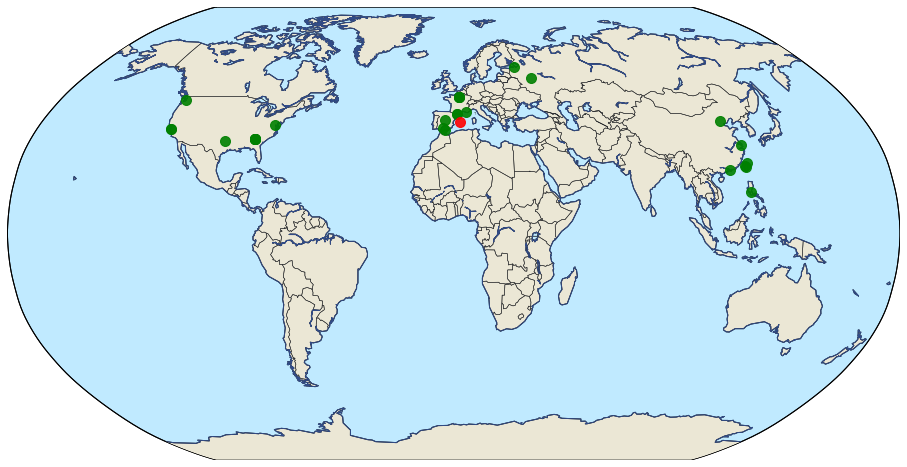

In [19]:
##########################################################################
##           DATA SCIENCE: S04.T01: Nivell 3 Exercici 4                 ##
##########################################################################
# Exercici 4: Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà
# amb l'anàlisi anterior.


my_map = plotWorldMapGeolocPoints (New_dfLogWeb, 'Latitud', 'Longitud')
    
    
#IT Department Location
x,y = my_map(2.65024 , 39.56939)
my_map.plot(x,y, color='r', marker = 'o' , markersize=10 , alpha = 0.9)


<span style=color:green><b>VISUALITZACIÓ GRÀFICA - GEOLOCALITZACIÓ</u></b></span> 

En la gràfica anterior hem posicionat de color verd al Mapa els punts que hem GEOLOCALITZAT prèviament amb l'ajut de la llibreria "ip2geotools". 

D'aquesta forma podem tenir una visió global i ràpida desde quin lloc es produeixen les visites a la àgina web.